In [2]:
# IMPORT NECESSARY PACKAGES
import re
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# from __future__ import unicode_literals
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [3]:
# Define Function to calculate the number of days in a year
def days_in_year(year):
        """Returns the number of days in a given year.
    
    >>> days_in_year(2020)
    366
    """
        if year % 4 == 0:
            if year % 100 == 0:
                if year % 400 == 0:
                    return 366
                else:
                    return 365
            else:
                return 366
        else:
            return 365
help(days_in_year)

Help on function days_in_year in module __main__:

days_in_year(year)
    Returns the number of days in a given year.

    >>> days_in_year(2020)
    366



In [4]:
# Define functions to standardize words in word cloud
def clean_text(text):
    """Remove symbols and trailing whitespaces"""
    cleaned_text = re.sub(r'[^\w\s]', '', text).replace("  ", " ").strip()
    return cleaned_text

def remove_stopwords(text):
    """Tokenize text and Remove English stop words"""
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = " ".join(filtered_words)
    return filtered_text

In [5]:
# Create a messagebox template for styling
def msgbox(text):
    """Returns a small message box within which text can be displayed"""
    
    # Find the maximum line length in the text
    max_line_length = max(len(line) for line in text.split("\n")) + 8

    # Create the top border of the box
    top_border = "╔" + "═" * (max_line_length + 2) + "╗"

    # Create the bottom border of the box
    bottom_border = "╚" + "═" * (max_line_length + 2) + "╝"

    # Create the lines of text inside the box
    text_lines = text.split("\n")
    formatted_lines = ["║ " + line.center(max_line_length) + " ║" for line in text_lines]

    # Combine all the components to create the boxed text
    boxed_text = "\n".join([top_border] + formatted_lines + [bottom_border])
    
    # show the output
    print(boxed_text)
help(msgbox)

Help on function msgbox in module __main__:

msgbox(text)
    Returns a small message box within which text can be displayed



In [6]:
book_list2021 = {1:{'Name':"The richest man in Babylon", 'Author':"George S. Clason", 'Pages':224, 'Format': "Print"}
                 , 2:{'Name':"The slight edge: Turning simple disciplines into massive success & happiness", 'Author':"Jeff Olson", 'Pages':280, 'Format': "Print"}
                 , 3:{'Name':"Intermittent fasting basics: Your guide to the essentials of intermittent fasting - and how it can work for you!", 'Author':"Lindsay Boyers", 'Pages':219, 'Format': "Print"}
                 , 4:{'Name':"The one thing: The surprisingly simple truth behind extraordinary results", 'Author':"Gary Keller", 'Pages':240, 'Format': "Print"}
                 , 5:{'Name':"Who moved my cheese: An A-Mazing way to deal with change in your work and in your life", 'Author':"Spencer Johnson", 'Pages':94, 'Format': "Print"}
                 , 6:{'Name':"Think and grow rich", 'Author':"Napoleon Hill", 'Pages':290, 'Format': "Ebook"}
                 , 7:{'Name':"Outwitting the devil: The secret to freedom and success", 'Author':"Napoleon Hill", 'Pages':302, 'Format': "Ebook"}
                 , 8:{'Name':"The four agreements: a practical guide to personal freedom", 'Author':"Don Miquel Ruiz", 'Pages':140, 'Format': "Print"}
                 , 9:{'Name':"Atomic habits: an easy and proven way to build good habits and break bad ones", 'Author':"James Clear", 'Pages':298, 'Format': "Print"}
                 , 10:{'Name':"How to win friends and influence people", 'Author':"Dale Carnegie", 'Pages':250, 'Format': "Print"}
                 , 11:{'Name':"Trading in the zone: master the market with confidence, discipline and a winning attitude", 'Author':"Mark Douglas", 'Pages':207, 'Format': "Print"}
                 , 12:{'Name':"Stone soup", 'Author':"Marcia Brown", 'Pages':52, 'Format': "Print"}
                 , 13:{'Name':"Rich dad's cashflow quadrant: Guide to financial freedom", 'Author':"Robert T. Kiyosaki", 'Pages':282, 'Format': "Ebook"}
                 , 14:{'Name':"A beginners guide to the stock market", 'Author':"Mathew R. Kratter", 'Pages':100, 'Format': "Ebook"}
                 , 15:{'Name':"Credit spread options for beginners: turn your most boring stocks into reliable monthly paychecks using call, put & iron butterfly spreads - even if the market is doing nothing", 'Author':"Freeman Publications", 'Pages':134, 'Format': "Ebook"}
                 , 16:{'Name':"Heart sick: Connecting the dots between hope, disappointment and healing", 'Author':"Conscious Core", 'Pages':107, 'Format': "Ebook"}
                 , 17:{'Name':"Thinking strategically: the competitive edge in business, politics and everyday life", 'Author':"Avinash K. Dixit & " "Barry J. Nalebuff", 'Pages':384, 'Format': "Ebook"}
                 , 18:{'Name':"Noise trading and illusory corrections in the US equity markets", 'Author':"Jennifer C. Bender & " "Carol L. Osler & " "David Simon", 'Pages':47, 'Format': "Research Paper"}
                }

In [7]:
BL21 = pd.DataFrame(book_list2021).transpose()
BL21

,Name,Author,Pages,Format
1,The richest man in Babylon,George S. Clason,224,Print
2,The slight edge: Turning simple disciplines in...,Jeff Olson,280,Print
3,Intermittent fasting basics: Your guide to the...,Lindsay Boyers,219,Print
4,The one thing: The surprisingly simple truth b...,Gary Keller,240,Print
5,Who moved my cheese: An A-Mazing way to deal w...,Spencer Johnson,94,Print
6,Think and grow rich,Napoleon Hill,290,Ebook
7,Outwitting the devil: The secret to freedom an...,Napoleon Hill,302,Ebook
8,The four agreements: a practical guide to pers...,Don Miquel Ruiz,140,Print
9,Atomic habits: an easy and proven way to build...,James Clear,298,Print
10,How to win friends and influence people,Dale Carnegie,250,Print


In [8]:
pages_read21 = BL21['Pages'].sum()
msgbox("2021 reading stats".upper())
print(f"Number of books read in 2021: \t\t\t\t {BL21['Name'].count()} books read in 2021")
print(f"Number of pages read in 2021: \t\t\t\t {format(pages_read21, ',d')} total pages read")
print(f"Average number of pages read per month in 2021: \t {round(pages_read21/12)} pages read per month")
print(f"Average number of pages read per day in 2021: \t\t {round(pages_read21/days_in_year(2021))} pages read per day")

╔════════════════════════════╗
║     2021 READING STATS     ║
╚════════════════════════════╝
Number of books read in 2021: 				 18 books read in 2021
Number of pages read in 2021: 				 3,650 total pages read
Average number of pages read per month in 2021: 	 304 pages read per month
Average number of pages read per day in 2021: 		 10 pages read per day


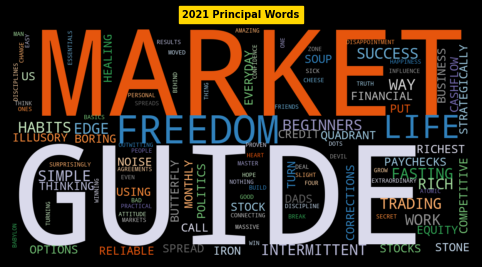

In [9]:
# Create filtered wordlist 
word_string = remove_stopwords(clean_text(" ".join(book.upper() for book in BL21['Name'])))

# Create a DataFrame with word counts
word_counts = pd.Series(word_string.split()).value_counts().reset_index()
word_counts.columns = ['Words', 'Count']
word_counts.sort_values(by=['Count', 'Words'], ascending=[False, True])

# Generate WordCloud with counts
wordcloud = WordCloud(
    background_color='black',
    scale=3,
    collocations=False,
    colormap='tab20c',
    normalize_plurals=True
).generate_from_frequencies(word_counts.set_index('Words')['Count'].to_dict())

# Plot WordCloud
plt.figure(figsize=(10, 3), facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("2021 Principal Words", fontweight='bold', color='black', backgroundcolor='gold', size=7)

plt.show()

In [10]:
book_list2022 = {1:{'Name':"The subtle art of not giving a F*ck: A counterintuitive approach to living a good life", 'Author':"Mark Manson", 'Pages':206, 'Format': "Ebook"}
                 , 2:{'Name':"Why we sleep; unlocking the power of sleep and dreams", 'Author':"Mathew Walker", 'Pages':323, 'Format': "Ebook"}
                 , 3:{'Name':"Ingredients: the strange chemistry of what we put in and on us", 'Author':"Goerge Zaidan", 'Pages':299, 'Format': "Print"}
                 , 4:{'Name':"We should all be millionaires: A woman's guide to earning more, building wealth, and gaining economic power", 'Author':"Rachel Rodgers", 'Pages':276, 'Format': "Ebook"}
                 , 5:{'Name':"The five love languages: The secret to love that lasts", 'Author':"Gary Chapman", 'Pages':272, 'Format': "Audiobook"}
                 , 6:{'Name':"The art of saying NO: How to stand your ground, reclain your time and energy, and refuse to be taken for granted (Without feeling guilty)", 'Author':"Damon Zahariades", 'Pages':160, 'Format': "Ebook"}
                 , 7:{'Name':"If you had controlling parents: How to make peace with your past and take your place in the world", 'Author':"Dan Neuharth", 'Pages':274, 'Format': "Ebook"}
                 , 8:{'Name':"Abundance beyond trauma: Discovering the courage for change and commitment to yourself", 'Author':"Jeannine L. Rashidi", 'Pages':169, 'Format': "Ebook"}
                 , 9:{'Name':"Dear Girl, A celebration of wonderful, smart and beautiful you!", 'Author':"Amy Krouse Rosenthal & " "Paris Rosenthal", 'Pages':40, 'Format': "Print"}
                }

In [11]:
BL22 = pd.DataFrame(book_list2022).transpose()
BL22

,Name,Author,Pages,Format
1,The subtle art of not giving a F*ck: A counter...,Mark Manson,206,Ebook
2,Why we sleep; unlocking the power of sleep and...,Mathew Walker,323,Ebook
3,Ingredients: the strange chemistry of what we ...,Goerge Zaidan,299,Print
4,We should all be millionaires: A woman's guide...,Rachel Rodgers,276,Ebook
5,The five love languages: The secret to love th...,Gary Chapman,272,Audiobook
6,The art of saying NO: How to stand your ground...,Damon Zahariades,160,Ebook
7,If you had controlling parents: How to make pe...,Dan Neuharth,274,Ebook
8,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook
9,"Dear Girl, A celebration of wonderful, smart a...",Amy Krouse Rosenthal & Paris Rosenthal,40,Print


In [12]:
pages_read22 = BL22['Pages'].sum()
msgbox("2022 reading stats".upper())
print(f"Number of books read in 2022: \t\t\t\t {BL22['Name'].count()} books read in 2022")
print(f"Number of pages read in 2022: \t\t\t\t {format(pages_read22, ',d')} total pages read")
print(f"Average number of pages read per month in 2022: \t {round(pages_read22/12)} pages read per month")
print(f"Average number of pages read per day in 2022: \t\t {round(pages_read22/days_in_year(2022))} pages read per day")

╔════════════════════════════╗
║     2022 READING STATS     ║
╚════════════════════════════╝
Number of books read in 2022: 				 9 books read in 2022
Number of pages read in 2022: 				 2,019 total pages read
Average number of pages read per month in 2022: 	 168 pages read per month
Average number of pages read per day in 2022: 		 6 pages read per day


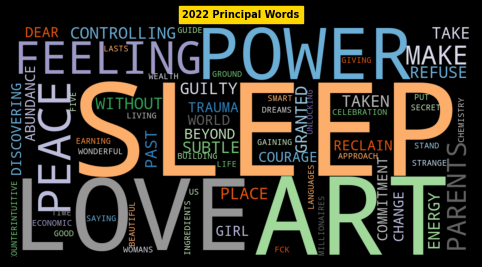

In [13]:
# Create filtered wordlist 
word_string = remove_stopwords(clean_text(" ".join(book.upper() for book in BL22['Name'])))

# Create a DataFrame with word counts
word_counts = pd.Series(word_string.split()).value_counts().reset_index()
word_counts.columns = ['Words', 'Count']
word_counts.sort_values(by=['Count', 'Words'], ascending=[False, True])

# Generate WordCloud with counts
wordcloud = WordCloud(
    background_color='black',
    scale=3,
    collocations=False,
    colormap='tab20c',
    normalize_plurals=True
).generate_from_frequencies(word_counts.set_index('Words')['Count'].to_dict())

# Plot WordCloud
plt.figure(figsize=(10, 3), facecolor='black')
plt.imshow(wordcloud, interpolation='hamming')
plt.axis('off')
plt.title("2022 Principal Words", fontweight='bold', color='black', backgroundcolor='gold', size=7)

plt.show()

In [14]:
book_list2023 = {"Name":[
      "The 7 habits of highly effective people: Powerful lessons in personal change"
     ,"Why your weirdness is wonderful: Embrace your quirks and live your strengths"
     ,"Be Quiet! (Mother Bruce Book 3)"
     ,"Red Riding Hood"
     ,"Storytelling with data: A visualization guide for business professionals"
     ,"Learning SQL: Generating, Manipulating and Retrieving Data"
     ,"Resonate: Present visual stories that transform audiences"
     ,"Deep Work: Rules for focused success in a distracted world"
     ,"The great gatsby"
     ,"Switch: How to change things when change is hard"
     ,"Rafiki the Chameleon"
     ,"The 4 hour work week: Escape the 9-5, live anywhere and join the new rich"
     ,"The declaration of independence and the constitution of the United States"
     ,"What makes the great great: strategies for extraordinary achievement"
     ,"Receiving healing through foriveness: A guide to freedom"
     ,"Thinking, fast and slow"
     ,"The light we carry: Overcoming in uncertain times"
     ,"Better data visualizations: A guide for scholars, researchers and wonks"
     ,"Computing machinery and intelligence"
     ,"War is kind"
     ,"Margin: Restoring emotional, physical, financial and time reserves to overloaded lives"
     ]
                 , "Author": ["Stephen R. Covey"
                            ,"Laurie Wallin"
                            ,"Ryan T. Higgins"
                            ,"Lydia L. Very"
                            ,"Cole Nussbaumer Knaflic"
                            ,"Alan Beaulieu"
                            ,"Nancy Duarte"
                            ,"Cal Newport"
                            ,"F. Scott Fitzgerald"
                            ,"Chip Heath & Dan Heath"
                            ,"Brent Todd"
                            ,"Timothy Ferriss"
                            ,"U.S. Citizenship and Immigration Services"
                            ,"Dennis P. Kimbro"
                            ,"Winsome Williams"
                            ,"Daniel Kahneman"
                            ,"Michelle Obama"
                            ,"Jonathan Schwabish"
                            ,"Alan M. Turing"
                            ,"Stephen Crane"
                            ,"Richard A. Swenson"
                            ]
                 , "Pages":[556, 193, 22, 53, 255, 610, 336
                            , 287, 233, 322, 46, 324, 56, 328
                            , 228, 514, 317, 449, 23, 42, 244
                            ]
                 , "Format": ["Ebook", "Ebook", "Ebook"
                              , "Ebook", "Print", "Audiobook"
                              , "Ebook", "Ebook", "Audiobook"
                              , "Ebook", "Ebook", "Audiobook"
                              , "Print", "Print", "Ebook"
                              , "Ebook", "Audiobook", "Print"
                              , "Research Paper", "Ebook", "Ebook"
                              ]
                 }

In [15]:
BL23 = pd.DataFrame(book_list2023)
BL23.index = BL23.index + 1
BL23

,Name,Author,Pages,Format
1,The 7 habits of highly effective people: Power...,Stephen R. Covey,556,Ebook
2,Why your weirdness is wonderful: Embrace your ...,Laurie Wallin,193,Ebook
3,Be Quiet! (Mother Bruce Book 3),Ryan T. Higgins,22,Ebook
4,Red Riding Hood,Lydia L. Very,53,Ebook
5,Storytelling with data: A visualization guide ...,Cole Nussbaumer Knaflic,255,Print
6,"Learning SQL: Generating, Manipulating and Ret...",Alan Beaulieu,610,Audiobook
7,Resonate: Present visual stories that transfor...,Nancy Duarte,336,Ebook
8,Deep Work: Rules for focused success in a dist...,Cal Newport,287,Ebook
9,The great gatsby,F. Scott Fitzgerald,233,Audiobook
10,Switch: How to change things when change is hard,Chip Heath & Dan Heath,322,Ebook


In [16]:
pages_read23 = BL23['Pages'].sum()
msgbox("2023 reading stats".upper())
print(f"Number of books read in 2023: \t\t\t\t {BL23['Name'].count()} books read in 2023")
print(f"Number of pages read in 2023: \t\t\t\t {format(pages_read23, ',d')} total pages read")
print(f"Average number of pages read per month in 2023: \t {round(pages_read23/12)} pages read per month")
print(f"Average number of pages read per day in 2023: \t\t {round(pages_read23/days_in_year(2023))} pages read per day")

╔════════════════════════════╗
║     2023 READING STATS     ║
╚════════════════════════════╝
Number of books read in 2023: 				 21 books read in 2023
Number of pages read in 2023: 				 5,438 total pages read
Average number of pages read per month in 2023: 	 453 pages read per month
Average number of pages read per day in 2023: 		 15 pages read per day


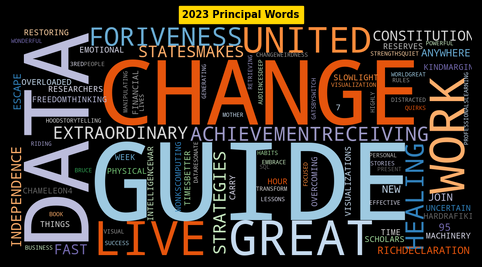

In [17]:
word_string=""

for book in BL23['Name']:
     word_string += remove_stopwords(clean_text(book.upper() + " "))

word_counts = pd.Series(word_string.split()).value_counts().reset_index()
word_counts.columns = ['Words', 'Count']
word_counts.sort_values(by=['Count', 'Words'], ascending=[False, True])

word_cloud = WordCloud(
    background_color='black',
    scale=3,
    collocations=False,
    colormap='tab20c',
    normalize_plurals=True
).generate_from_frequencies(word_counts.set_index('Words')['Count'].to_dict())

plt.figure(figsize = (10, 3), facecolor='black')
plt.imshow(word_cloud, interpolation = 'blackman')
plt.axis('off')
plt.title("2023 Principal Words", fontweight='bold', color='black', backgroundcolor='gold', size=7)

plt.show()

In [18]:
book_list2024 = {
    1:{'Name':"I will teach you to be rich: No guilt. No excuses. No BS. Just a 6-week program that works", 'Author':"Ramit Sethi", 'Pages':342, 'Format': "Audiobook"}
    , 2:{'Name':"Show don't tell: How to write vivid descriptions, handle backstory, and describe your characters' emotions (Writers' Guide Series)", 'Author':"Sandra Gerth", 'Pages':114, 'Format': "Ebook"}
    , 3:{'Name':"The desciplined trader: Developing winning attitudes", 'Author':"Mark Douglas", 'Pages':184, 'Format': "Audiobook"}
    , 4:{'Name':"Ikigai: The Japanese secret to a long and happy life", 'Author':"Héctor Garcia & Francesc Miralles", 'Pages':204, 'Format': "Ebook"}
    , 5:{'Name':"Market Wizards: Interviews with top traders", 'Author':"Jack D. Schwager", 'Pages':480, 'Format': "Print"}
    , 6:{'Name':"The secret: A gripping novel of how far a mother would go for her child", 'Author':"Kathryn Hughes", 'Pages':321, 'Format': "Ebook"}
    , 7:{'Name':"The signal and the noise: Why so many predictions fail - but some don't", 'Author':"Nate Silver", 'Pages':534, 'Format': "Print"}
    , 8:{'Name':"The power of your subconscious mind", 'Author':"Joseph Murphy", 'Pages':224, 'Format': "Ebook"}
    , 9:{'Name':"The Alchemist", 'Author':"Paul Coelho", 'Pages':87, 'Format': "Ebook"}
    , 10:{'Name':"The power of now: a guide to spiritual enlightenment", 'Author':"Eckhart Tolle", 'Pages':236, 'Format': "Print"}
    # , 11:{'Name':"Who moved my cheese: An A-Mazing way to deal with change in your work and in your life", 'Author':"Spencer Johnson", 'Pages':94, 'Format': "Print"}
    #, :{'Name':"", 'Author':"", 'Pages':, 'Format': ""}
                }

In [19]:
BL24 = pd.DataFrame(book_list2024).transpose()
BL24


,Name,Author,Pages,Format
1,I will teach you to be rich: No guilt. No excu...,Ramit Sethi,342,Audiobook
2,Show don't tell: How to write vivid descriptio...,Sandra Gerth,114,Ebook
3,The desciplined trader: Developing winning att...,Mark Douglas,184,Audiobook
4,Ikigai: The Japanese secret to a long and happ...,Héctor Garcia & Francesc Miralles,204,Ebook
5,Market Wizards: Interviews with top traders,Jack D. Schwager,480,Print
6,The secret: A gripping novel of how far a moth...,Kathryn Hughes,321,Ebook
7,The signal and the noise: Why so many predicti...,Nate Silver,534,Print
8,The power of your subconscious mind,Joseph Murphy,224,Ebook
9,The Alchemist,Paul Coelho,87,Ebook
10,The power of now: a guide to spiritual enlight...,Eckhart Tolle,236,Print


In [20]:
pages_read24 = BL24['Pages'].sum()
msgbox("2024 reading stats".upper())
print(f"Number of books read in 2024: \t\t\t\t {BL24['Name'].count()} books read in 2024")
print(f"Number of pages read in 2024: \t\t\t\t {format(pages_read24, ',d')} total pages read")
print(f"Average number of pages read per month in 2024: \t {round(pages_read24/12)} pages read per month")
print(f"Average number of pages read per day in 2024: \t\t {round(pages_read24/days_in_year(2024))} pages read per day")


╔════════════════════════════╗
║     2024 READING STATS     ║
╚════════════════════════════╝
Number of books read in 2024: 				 10 books read in 2024
Number of pages read in 2024: 				 2,726 total pages read
Average number of pages read per month in 2024: 	 227 pages read per month
Average number of pages read per day in 2024: 		 7 pages read per day


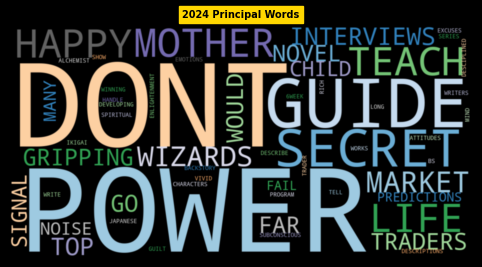

In [21]:
# Create filtered wordlist 
word_string = remove_stopwords(clean_text(" ".join(book.upper() for book in BL24['Name'])))

# Create a DataFrame with word counts
word_counts = pd.Series(word_string.split()).value_counts().reset_index()
word_counts.columns = ['Words', 'Count']
word_counts.sort_values(by=['Count', 'Words'], ascending=[False, True])
# word_counts

# Generate WordCloud with counts
wordcloud = WordCloud(
    background_color='black',
    scale=3,
    collocations=False,  # set to False to treat each word as unique
    colormap='tab20c',
    normalize_plurals=True
).generate_from_frequencies(word_counts.set_index('Words')['Count'].to_dict())

# Plot WordCloud
plt.figure(figsize=(10, 3), facecolor='black')
plt.imshow(wordcloud, interpolation='quadric')
'gaussian', 'spline16', 'lanczos', 'quadric', 'spline36', 'hanning', 'hamming', 'bessel','kaiser',
'nearest', 'none', 'blackman', 'bilinear', 'bicubic', 'sinc', 'catrom', 'antialiased', 'hermite', 'mitchell'
plt.axis('off')
plt.title("2024 Principal Words", fontweight='bold', color='black', backgroundcolor='gold', size=7)
plt.show()

In [22]:
BL21['Year Read'] = '2021'
BL22['Year Read'] = '2022'
BL23['Year Read'] = '2023'
BL24['Year Read'] = '2024'

In [23]:
comb_list = pd.concat([BL21, BL22, BL23, BL24]).sort_values(by='Name').set_index(
            [pd.Index(range(1, len(BL21) + len(BL22) + len(BL23) + len(BL24) + 1))])
comb_list.info()
comb_list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 1 to 58
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       58 non-null     object
 1   Author     58 non-null     object
 2   Pages      58 non-null     object
 3   Format     58 non-null     object
 4   Year Read  58 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB


,Name,Author,Pages,Format,Year Read
1,A beginners guide to the stock market,Mathew R. Kratter,100,Ebook,2021
2,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook,2022
3,Atomic habits: an easy and proven way to build...,James Clear,298,Print,2021
4,Be Quiet! (Mother Bruce Book 3),Ryan T. Higgins,22,Ebook,2023
5,Better data visualizations: A guide for schola...,Jonathan Schwabish,449,Print,2023
6,Computing machinery and intelligence,Alan M. Turing,23,Research Paper,2023
7,Credit spread options for beginners: turn your...,Freeman Publications,134,Ebook,2021
8,"Dear Girl, A celebration of wonderful, smart a...",Amy Krouse Rosenthal & Paris Rosenthal,40,Print,2022
9,Deep Work: Rules for focused success in a dist...,Cal Newport,287,Ebook,2023
10,"Heart sick: Connecting the dots between hope, ...",Conscious Core,107,Ebook,2021


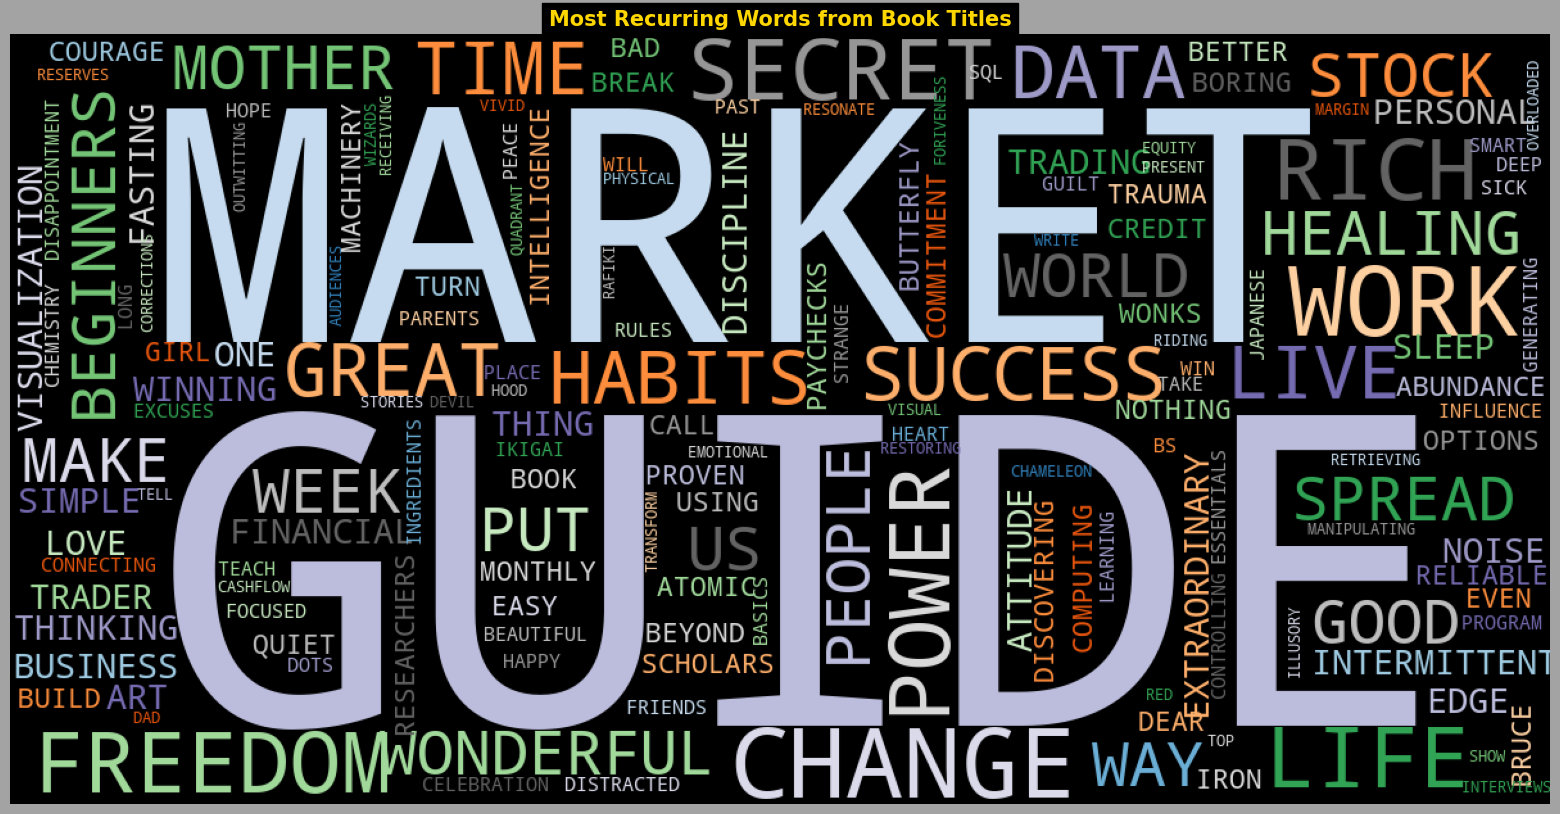

In [24]:
word_string = " ".join(book.upper() for book in comb_list['Name'])

word_cloud = WordCloud(background_color='black',scale=3, collocations=True, colormap='tab20c', 
                       normalize_plurals=True).generate_from_text(word_string)

plt.figure(figsize = (20,10), facecolor=(0,0,0,0.36))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Most Recurring Words from Book Titles", fontweight='bold', color='gold', backgroundcolor='black', fontsize=15)

plt.show()

In [25]:
print('Key Words in Book Titles')
comb_list[comb_list['Name'].str.contains(
    'power| abundance| heal| habit| time| invest| change| live| grow| discipline| courage| learn'
    , case=False)].set_index('Year Read')

Key Words in Book Titles


,Name,Author,Pages,Format
Year Read,,,,
2022,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook
2021,Atomic habits: an easy and proven way to build...,James Clear,298,Print
2021,"Heart sick: Connecting the dots between hope, ...",Conscious Core,107,Ebook
2023,"Margin: Restoring emotional, physical, financi...",Richard A. Swenson,244,Ebook
2023,Receiving healing through foriveness: A guide ...,Winsome Williams,228,Ebook
2023,Switch: How to change things when change is hard,Chip Heath & Dan Heath,322,Ebook
2023,"The 4 hour work week: Escape the 9-5, live any...",Timothy Ferriss,324,Audiobook
2023,The 7 habits of highly effective people: Power...,Stephen R. Covey,556,Ebook
2022,The art of saying NO: How to stand your ground...,Damon Zahariades,160,Ebook


In [26]:
# Save file as CSV adding book length bins to create a power BI dashboard
labels = ['Short', 'Medium', 'Long']
bins = [0, 200, 280, 1000]
comb_list['Bin'] = pd.cut(comb_list['Pages'], bins=bins, labels=labels)
comb_list.to_csv('reading_list.csv', index=False)

comb_list.pivot_table(index=['Year Read','Format', 'Bin'], aggfunc={'Name': 'count', 'Pages': 'sum'}, observed=False).rename(
    columns={'Name': 'Books Read', 'Pages': 'Pages Read'})


Books Read Pages Read
Year Read Format         Bin                          
2021      Audiobook      Short            0          0
                         Medium           0          0
                         Long             0          0
          Ebook          Short            3        341
                         Medium           0          0
                         Long             4       1258
          Print          Short            3        286
                         Medium           6       1420
                         Long             1        298
          Research Paper Short            1         47
                         Medium           0          0
                         Long             0          0
2022      Audiobook      Short            0          0
                         Medium           1        272
                         Long             0          0
          Ebook          Short            2        329
                         Medium           3        756
                         Long             1        323
          Print          Short            1         40
                         Medium           0          0
                         Long             1        299
          Research Paper Short            0          0
                         Medium           0          0
                         Long             0          0
2023      Audiobook      Short            0          0
                         Medium           1        233
                         Long             3       1251
          Ebook          Short            5        356
                         Medium           2        472
                         Long             5       2015
          Print          Short            1         56
                         Medium           1        255
                         Long             2        777
          Research Paper Short            1         23
                         Medium           0          0
                         Long             0          0
2024      Audiobook      Short            1        184
                         Medium           0          0
                         Long             1        342
          Ebook          Short            2        201
                         Medium           2        428
                         Long             1        321
          Print          Short            0          0
                         Medium           1        236
                         Long             2       1014
          Research Paper Short            0          0
                         Medium           0          0
                         Long             0          0

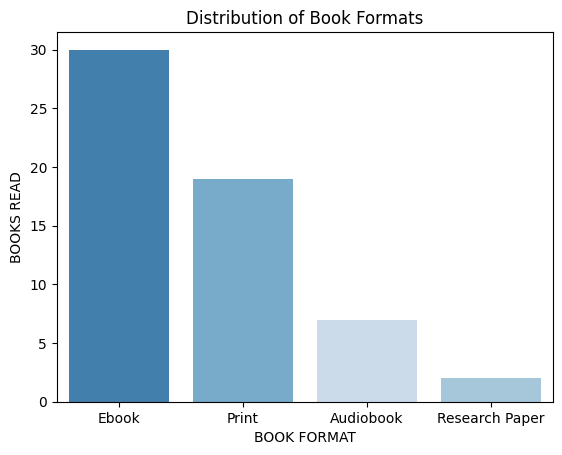

In [27]:
#Display the distribution of book formats
plt.figure()
sns.countplot(data=comb_list, x='Format', palette='tab20c', saturation=0.75
              ,hue='Format', order=['Ebook', 'Print', 'Audiobook', 'Research Paper'])
plt.title('Distribution of Book Formats')
plt.xlabel('Book Format'.upper())
plt.ylabel('Books Read'.upper())
plt.show()

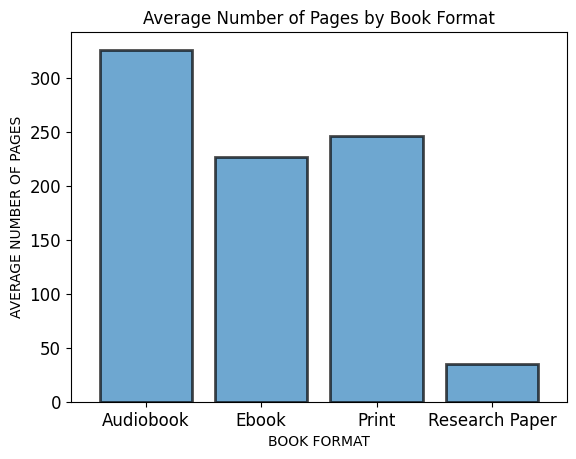

In [28]:
# Calculate the average number of pages for each book format
avg_pages_by_format = comb_list.groupby('Format')['Pages'].mean()

avg_pages_by_format.plot(kind='bar', title='Average Number of Pages by Book Format', 
                         rot=0, fontsize=12, edgecolor='black', linewidth=2, alpha=0.7, 
                         width=0.8, align='center', position=0.5, use_index=True, 
                         colormap='tab20c', table=False)
plt.ylabel('Average Number of Pages'.upper())
plt.xlabel('Book Format'.upper())

plt.show()

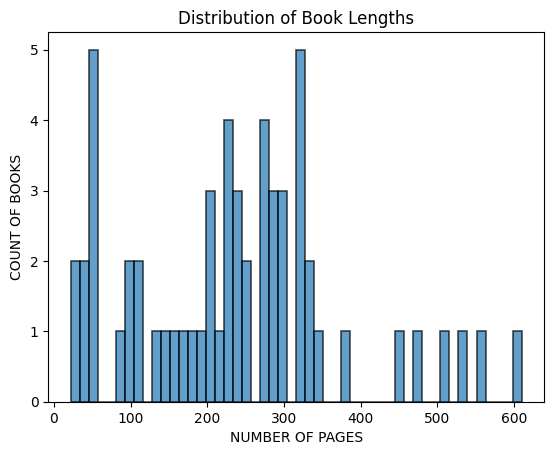

In [29]:
# Plotting a histogram of book lengths (number of pages)
plt.hist(comb_list['Pages'], bins=50, edgecolor='black', linewidth=1.2, alpha=0.7, align='mid')
plt.setp(plt.gca().get_xticklabels(), rotation=0, horizontalalignment='center')
plt.title('Distribution of Book Lengths')
plt.xlabel('Number of Pages'.upper())
plt.ylabel('Count of Books'.upper())

plt.show()

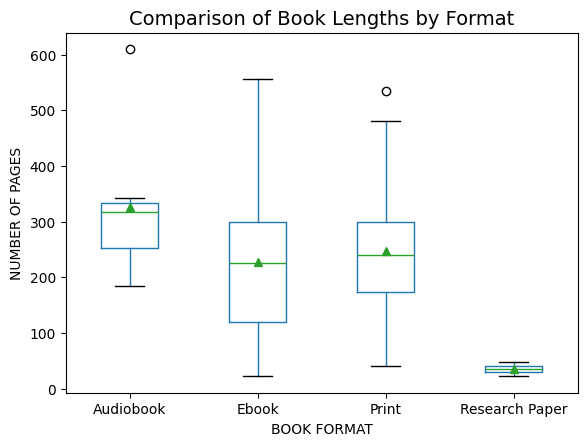

In [30]:
# Creating a box plot to compare book lengths across formats
comb_list.boxplot(column='Pages', by='Format', showfliers=True, showmeans=True, meanline=False, grid=False)
plt.title('Comparison of Book Lengths by Format', loc='center', fontsize=14)
plt.setp(plt.gca().get_xticklabels(), horizontalalignment='center')
plt.xlabel('Book Format'.upper())
plt.ylabel('Number of Pages'.upper())
plt.suptitle('')

plt.show()

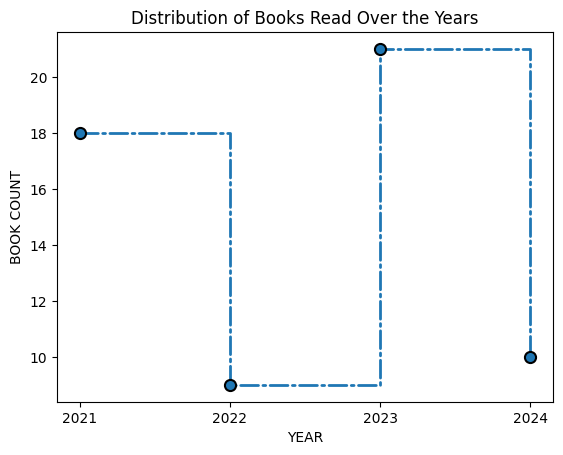

In [31]:
# Count the occurrences of books read by year
books_by_year = comb_list['Year Read'].value_counts().sort_index()

# Plot the distribution of books read over the years
plt.plot(books_by_year.index, books_by_year.values, marker='o', 
         linestyle='-.', linewidth=2, markeredgecolor='black', 
         markersize=8, markeredgewidth=1.5, antialiased=True,
         markerfacecoloralt='black', dash_capstyle='round', 
         dash_joinstyle='round', solid_capstyle='round',
         solid_joinstyle='round',  snap=True, drawstyle='steps-post')
plt.title('Distribution of Books Read Over the Years')
plt.xlabel('Year'.upper())
plt.ylabel('Book Count'.upper())

plt.show()

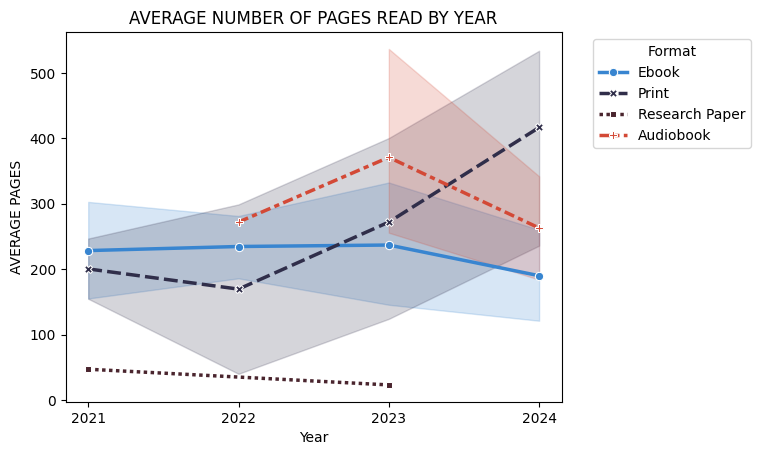

In [32]:
# Plot the average number of pages by year
plt.figure()
sns.lineplot(data=comb_list, x='Year Read', y='Pages', hue='Format'
             , palette='icefire', linewidth=2.5, style='Format'
             , markers=True, legend='full', estimator='mean')
plt.xlabel('Year')
plt.ylabel('Average Pages'.upper())
plt.title('Average Number of Pages Read by Year'.upper())
plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

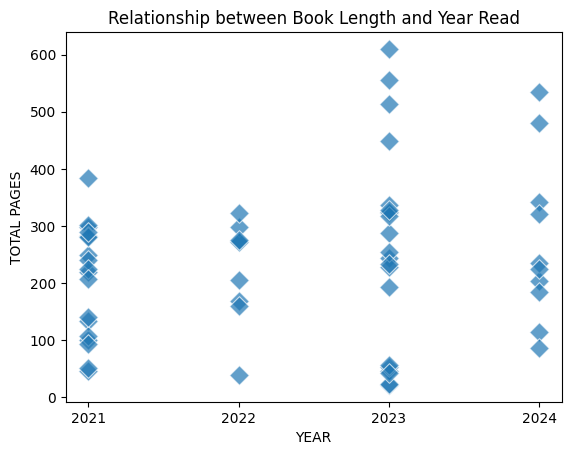

In [33]:
# Creating a scatter plot to visualize the relationship between book length and reading time
sns.scatterplot(data=comb_list, y='Pages', x='Year Read', 
             alpha=0.7, edgecolor='white', s=100, marker='D')
plt.title('Relationship between Book Length and Year Read')
plt.ylabel('Total Pages'.upper())
plt.xlabel('Year'.upper())

plt.show()